C:\Users\lenovo\AppData\Local\Temp\ipykernel_9404\2680300764.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\lenovo\.conda\envs\keras_env\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\lenovo\.conda\envs\keras_env\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\lenovo\.conda\envs\keras_env\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\lenovo\.conda\envs\keras_env\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\leno

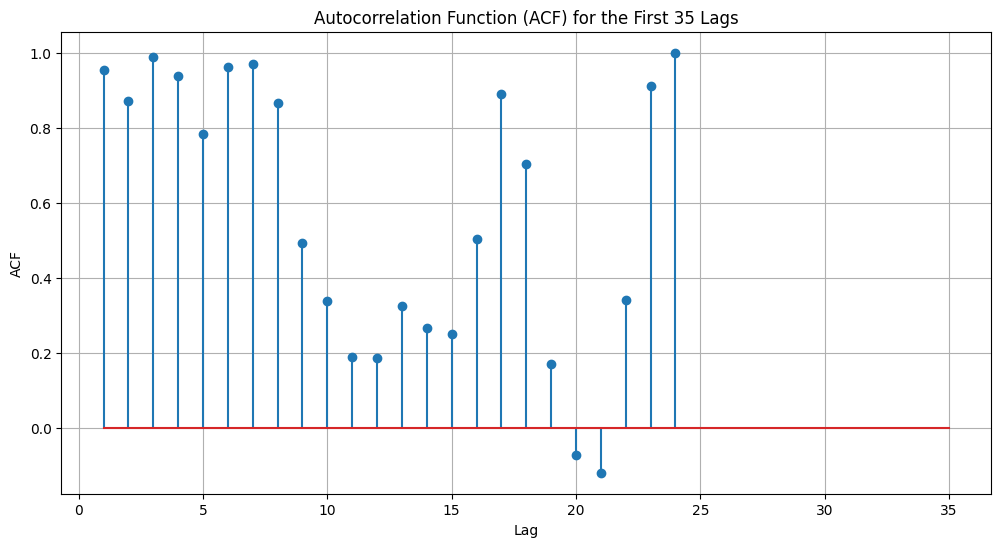

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the NVIDIA dataset
data = pd.read_csv('C:/Users/lenovo/Downloads/archive (2)/NVIDIA/NvidiaStockPrice.csv')

# Convert 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample data to yearly frequency and take mean of 'Close' prices
data_yearly = data['Close'].resample('Y').mean()

# Convert the data to a numpy array
data_array = data_yearly.values

# Compute mean and variance
mean = np.mean(data_array)
variance = np.var(data_array)

# Normalize the data
normalized_data = (data_array - mean) / np.sqrt(variance)

# Function to compute autocorrelation
def autocorrelation(data, lag):
    return np.corrcoef(data[:-lag], data[lag:])[0, 1]

# Compute autocorrelation for the first 35 lags
lags = range(1, 36)
acf_values = [autocorrelation(normalized_data, lag) for lag in lags]

# Plot the autocorrelation function
plt.figure(figsize=(12, 6))
plt.stem(lags, acf_values, use_line_collection=True)
plt.title('Autocorrelation Function (ACF) for the First 35 Lags')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()
